In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.pyplot import xticks

In [2]:
# loading the data from csv file to pandas dataframe
df = pd.read_csv("car_price_dataset.csv")

In [3]:
# Printing first five rows of the dataset
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5,17.74


In [4]:
df.shape
# Data has 12 columns and 5845 rows.

(5845, 12)

In [5]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5845.000000,5.845000e+03,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000
mean,2013.481095,5.832263e+04,18.362270,1623.067921,113.148484,5.285030,9.551239
std,3.163283,9.234777e+04,4.194806,599.204137,53.811881,0.806707,11.194737
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.348500e+04,15.300000,1198.000000,75.000000,5.000000,3.520000
50%,2014.000000,5.255300e+04,18.330000,1495.000000,94.680000,5.000000,5.710000
75%,2016.000000,7.241100e+04,21.100000,1984.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5845 non-null   object 
 1   Location           5845 non-null   object 
 2   Year               5845 non-null   int64  
 3   Kilometers_Driven  5845 non-null   int64  
 4   Fuel_Type          5845 non-null   object 
 5   Transmission       5845 non-null   object 
 6   Owner_Type         5845 non-null   object 
 7   Mileage            5845 non-null   float64
 8   Engine             5845 non-null   int64  
 9   Power              5845 non-null   float64
 10  Seats              5845 non-null   int64  
 11  Price              5845 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 548.1+ KB


In [7]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

# Data Cleaning

In [8]:
df.isnull().sum()*100/df.shape[0]

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

In [9]:
df=df.dropna(axis=0)

In [10]:
df.isnull().sum()*100/df.shape[0]

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Mileage              0.0
Engine               0.0
Power                0.0
Seats                0.0
Price                0.0
dtype: float64

# Exploratory Data Analysis ( EDA )
Univariate Analysis

Price : Target Variable

In [11]:
df.Price.describe()

count    5845.000000
mean        9.551239
std        11.194737
min         0.440000
25%         3.520000
50%         5.710000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

C:\Users\Yeswanth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

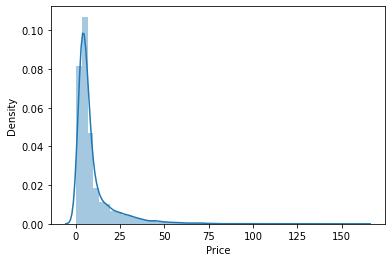

In [12]:
sns.distplot(df['Price'])

# Car Name

In [13]:
df['brand'] = df.Name.str.split(' ').str.get(0).str.upper()
len(set(df.brand.values))

29

C:\Users\Yeswanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


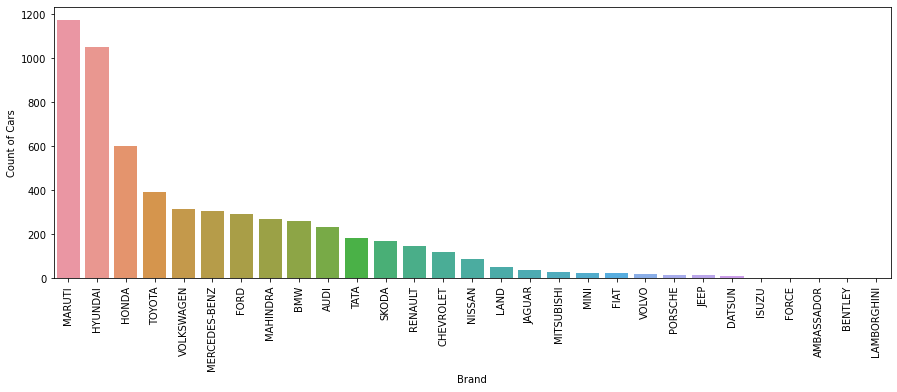

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [15]:
df.brand.describe()

count       5845
unique        29
top       MARUTI
freq        1175
Name: brand, dtype: object

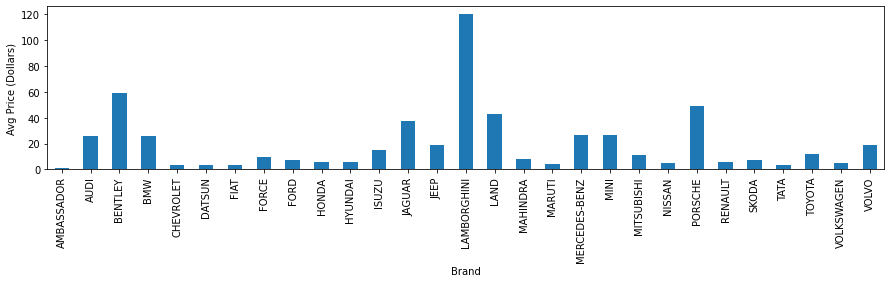

In [16]:
df_comp_avg_price = df[['brand','Price']].groupby("brand", as_index = False).mean().rename(columns={'Price':'brand_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [17]:
df = df.merge(df_comp_avg_price, on = 'brand')

In [18]:
df['brand_category'] = df['brand_avg_price'].apply(lambda x : "Budget" if x < 8 
                                                     else ("Mid_Range" if 8 <= x < 15
                                                           else "Luxury"))

# Fuel Type

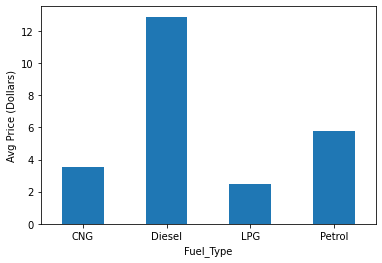

In [19]:
df_fuel_avg_price = df[['Fuel_Type','Price']].groupby("Fuel_Type", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'Fuel_Type', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel_Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Transmission

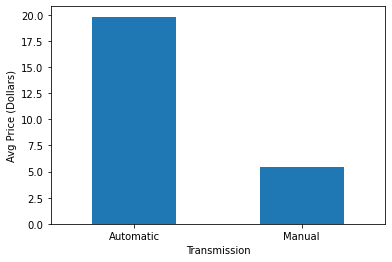

In [20]:
df_transmission_avg_price = df[['Transmission','Price']].groupby("Transmission", as_index = False).mean().rename(columns={'price':'transmission_avg_price'})
plt1 = df_transmission_avg_price.plot(x = 'Transmission', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Transmission")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Owner_Type

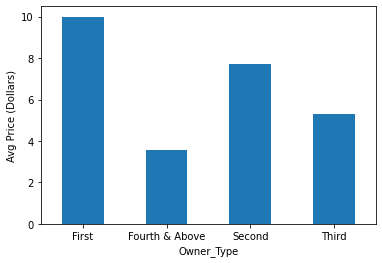

In [21]:
df_owner_type_avg_price = df[['Owner_Type','Price']].groupby("Owner_Type", as_index = False).mean().rename(columns={'price':'owner_type_avg_price'})
plt1 = df_owner_type_avg_price.plot(x = 'Owner_Type', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Owner_Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Seats

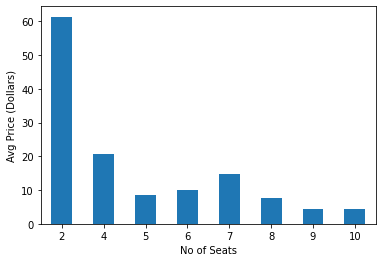

In [22]:
df_seat_avg_price = df[['Seats','Price']].groupby("Seats", as_index = False).mean().rename(columns={'price':'seat_avg_price'})
plt1 = df_seat_avg_price.plot(x = 'Seats', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Seats")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Kilometers_Driven

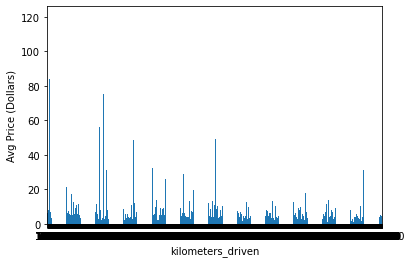

In [23]:
df_kilometers_driven_avg_price = df[['Kilometers_Driven','Price']].groupby("Kilometers_Driven", as_index = False).mean().rename(columns={'price':'kilometers_driven_avg_price'})
plt1 = df_kilometers_driven_avg_price.plot(x = 'Kilometers_Driven', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("kilometers_driven")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

# Mileage

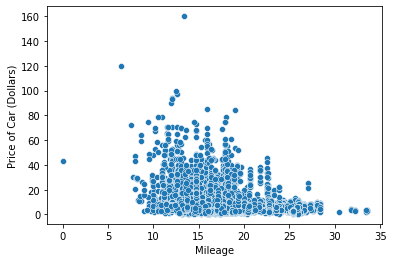

In [24]:
plt1 = sns.scatterplot(x = 'Mileage', y = 'Price', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# Engine

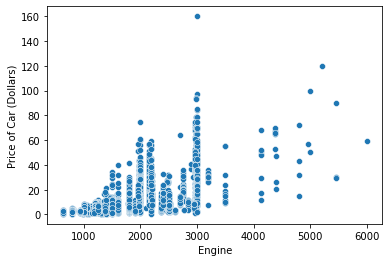

In [25]:
plt1 = sns.scatterplot(x = 'Engine', y = 'Price', data = df)
plt1.set_xlabel('Engine')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

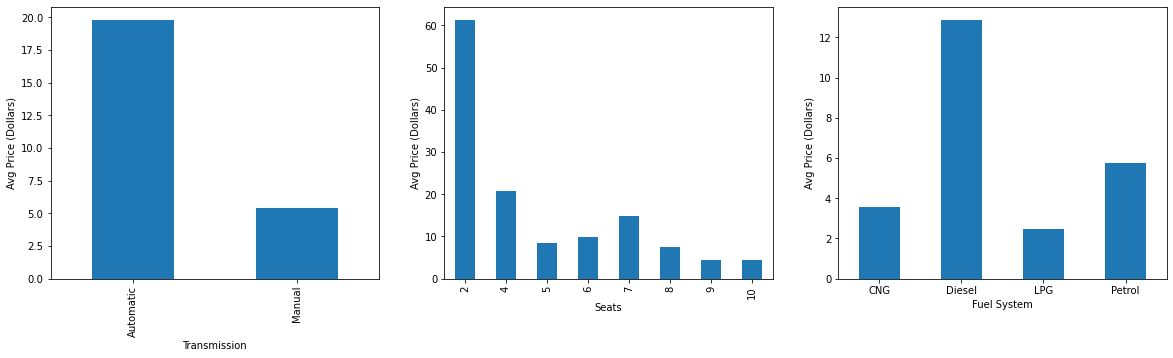

In [26]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_Transmission_avg_price = df[['Transmission','Price']].groupby("Transmission", as_index = False).mean().rename(columns={'Price':'Transmission_avg_price'})
plt1 = df_Transmission_avg_price.plot(x = 'Transmission', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Transmission")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_seats_avg_price = df[['Seats','Price']].groupby("Seats", as_index = False).mean().rename(columns={'Price':'seats_avg_price'})
plt1 = df_seats_avg_price.plot(x = 'Seats', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Seats")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_fuelsystem_avg_price = df[['Fuel_Type','Price']].groupby("Fuel_Type", as_index = False).mean().rename(columns={'Price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'Fuel_Type', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()


In [27]:
# Let's see how price varies with mileage.

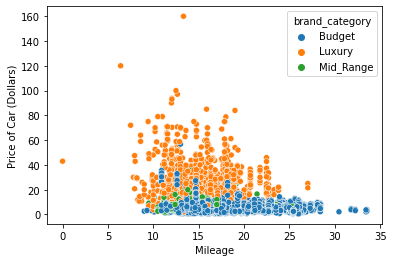

In [28]:
plt1 = sns.scatterplot(x = 'Mileage', y = 'Price', hue = 'brand_category', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

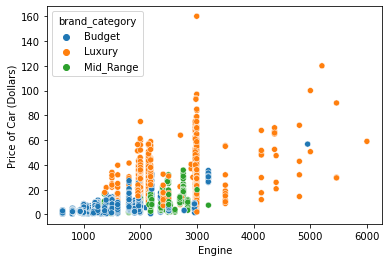

In [29]:
plt1 = sns.scatterplot(x = 'Engine', y = 'Price', hue = 'brand_category', data = df)
plt1.set_xlabel('Engine')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

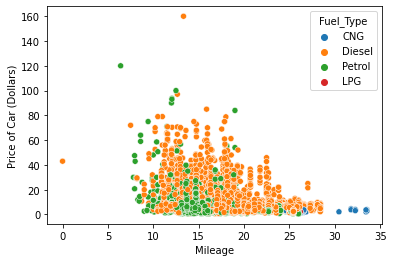

In [30]:
plt1 = sns.scatterplot(x = 'Mileage', y = 'Price', hue = 'Fuel_Type', data = df)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

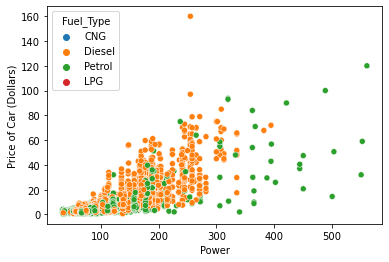

In [31]:
plt1 = sns.scatterplot(x = 'Power', y = 'Price', hue = 'Fuel_Type', data = df)
plt1.set_xlabel('Power')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

# Linear Regression Model

In [32]:
auto = df[['Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'brand_category']]

In [33]:
auto.head()

,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand_category
0,CNG,Manual,First,26.60,998,58.16,5,1.75,Budget
1,Diesel,Manual,First,20.77,1248,88.76,7,6.00,Budget
2,Petrol,Manual,First,21.56,1462,103.25,5,9.95,Budget
3,Diesel,Manual,First,25.20,1248,74.00,5,5.60,Budget
4,Diesel,Manual,First,28.40,1248,74.00,5,5.99,Budget


# Visualising the Data

<Figure size 1080x1080 with 0 Axes>

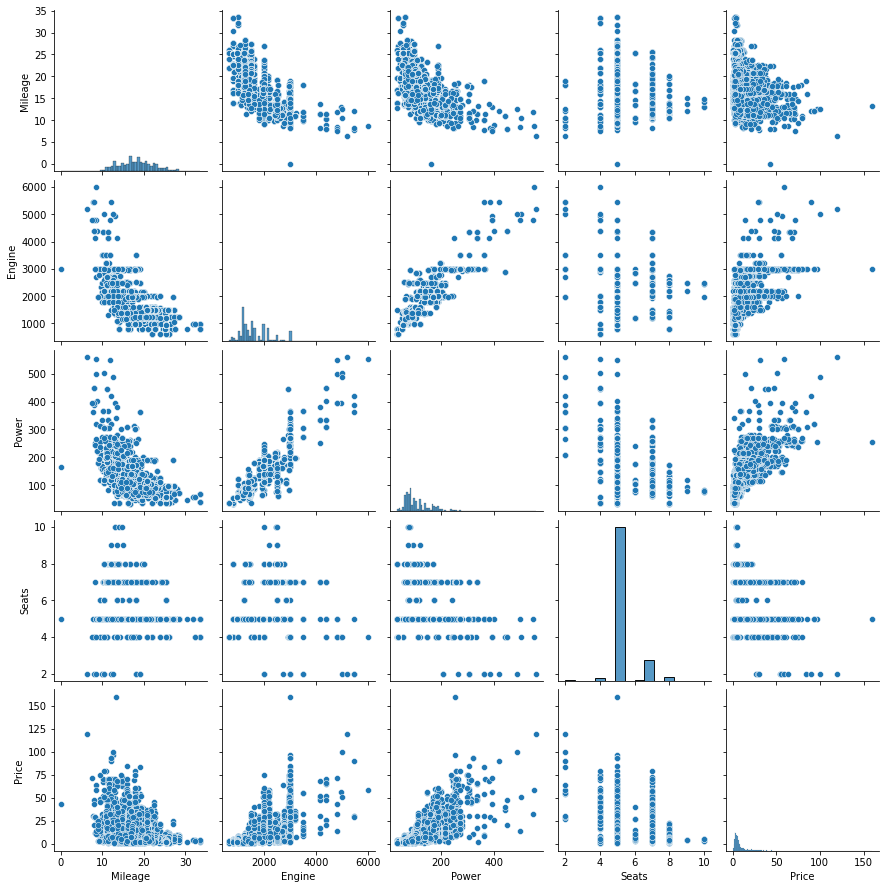

In [34]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

# Visualising Categorical Variables

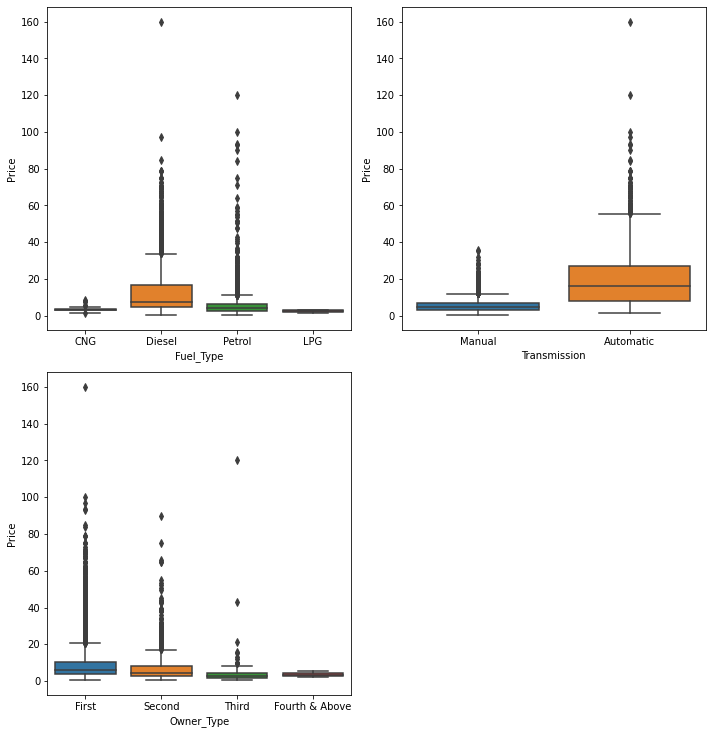

In [35]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = auto)
plt.subplot(4,2,2)
sns.boxplot(x = 'Transmission', y = 'Price', data = auto)
plt.subplot(4,2,3)
sns.boxplot(x = 'Owner_Type', y = 'Price', data = auto)
plt.tight_layout()
plt.show()

# Data Preparation

Dummy Variables

In [36]:
ful_typ = pd.get_dummies(auto['Fuel_Type'], drop_first = True)

In [37]:
auto = pd.concat([auto, ful_typ], axis = 1)

In [38]:
trns = pd.get_dummies(auto['Transmission'], drop_first = True)

In [39]:
auto = pd.concat([auto, trns], axis = 1)

In [40]:
trns = pd.get_dummies(auto['Owner_Type'], drop_first = True)

In [41]:
auto = pd.concat([auto, trns], axis = 1)

In [42]:
brnd_ctr = pd.get_dummies(auto['brand_category'], drop_first = True)

In [43]:
auto = pd.concat([auto, brnd_ctr], axis = 1)

In [44]:
auto.drop(['Fuel_Type', 'Transmission', 'Owner_Type', 'brand_category'], axis = 1, inplace = True)

# Model Building
Splitting the Data into Training and Testing sets

In [65]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 42)

# Rescaling the Features

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Mileage', 'Engine', 'Power', 'Seats','Price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,Mileage,Engine,Power,Seats,Price,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third,Luxury,Mid_Range
4500,0.357782,0.282613,0.284899,0.375,0.105296,0,0,1,0,0,0,0,1,0
1807,0.727490,0.102543,0.069989,0.375,0.025384,1,0,0,1,0,0,0,0,0
4053,0.304114,0.773827,0.520730,0.625,0.435914,1,0,0,0,0,0,0,1,0
139,0.551580,0.118462,0.098136,0.375,0.006581,0,0,1,1,0,1,0,0,0
5002,0.450209,0.321480,0.201217,0.625,0.049577,1,0,0,1,0,0,0,0,1


In [70]:
df_train.describe()

,Mileage,Engine,Power,Seats,Price,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third,Luxury,Mid_Range
count,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000,4091.000000
mean,0.546200,0.206648,0.149812,0.411238,0.056775,0.533855,0.001467,0.456612,0.714251,0.001222,0.158396,0.018577,0.166463,0.119775
std,0.124886,0.123673,0.102130,0.101226,0.071099,0.498914,0.038273,0.498175,0.451826,0.034943,0.365157,0.135043,0.372541,0.324738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.455874,0.118669,0.078490,0.375000,0.019116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542636,0.180277,0.120768,0.375000,0.033218,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.629100,0.282613,0.197604,0.375000,0.059229,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


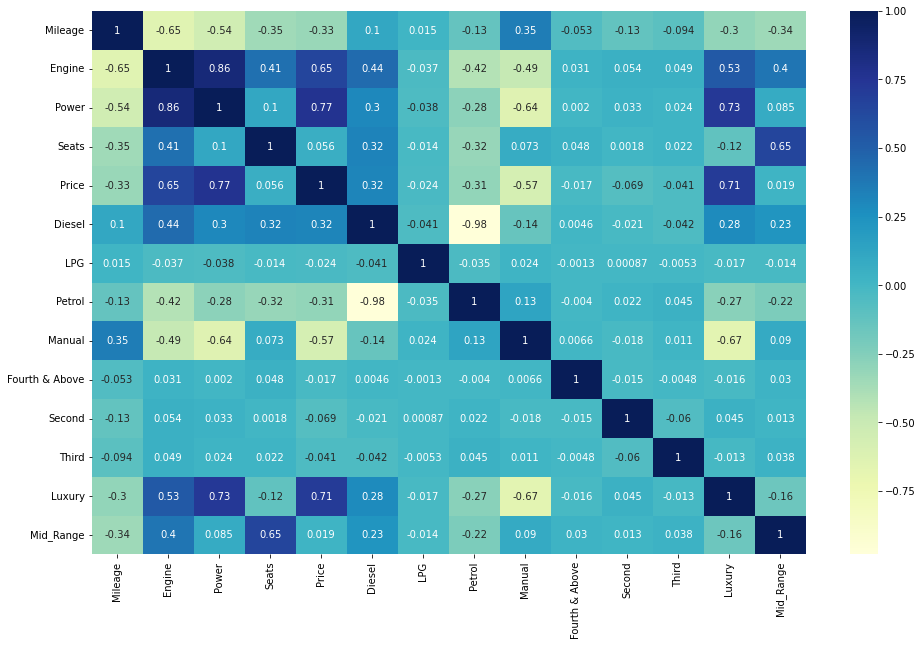

In [71]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Dividing into X and Y sets for the model building

In [72]:
y_train = df_train.pop('Price')
X_train = df_train

In [73]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #print(~df.isin([np.nan, np.inf, -np.inf]).any(1)!=True)
    return df[indices_to_keep].astype(np.float64)

In [74]:
lm = LinearRegression()
#clean_dataset(X_train)

lm.fit(X_train, y_train)

LinearRegression()

In [75]:
training_data_prediction = lm.predict(X_train)

In [76]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6624412100302808


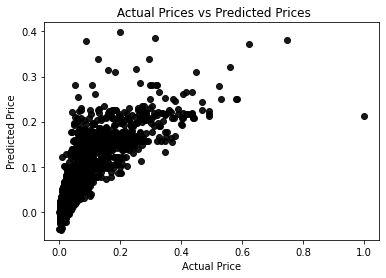

In [77]:
plt.scatter(y_train, training_data_prediction, color = "black", alpha = 0.9)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [78]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Mileage', 'Engine', 'Power', 'Seats','Price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [79]:
df_test.head()

,Mileage,Engine,Power,Seats,Price,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third,Luxury,Mid_Range
5687,0.279440,0.181243,0.133874,0.428571,0.060126,0,0,1,1,0,0,0,0,0
5659,0.207151,0.218459,0.242951,0.428571,0.029597,0,0,1,1,0,0,0,0,0
2317,0.388263,0.106811,0.101390,0.428571,0.046569,0,0,1,1,0,1,0,0,0
5525,0.259619,0.144213,0.112978,0.428571,0.017179,0,0,1,1,0,1,0,0,0
681,0.675865,0.116115,0.076864,0.428571,0.053710,1,0,0,1,0,0,0,0,0


In [80]:
y_test = df_test.pop('Price')
X_test = df_test

In [81]:
lm = LinearRegression()
#clean_dataset(X_train)

lm.fit(X_test, y_test)

LinearRegression()

In [82]:
testing_data_prediction = lm.predict(X_test)

In [83]:
# R squared Error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7035678412295385


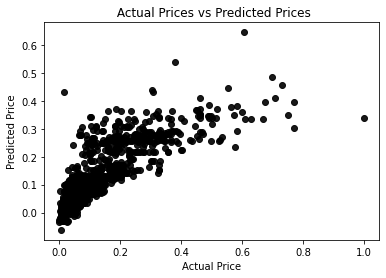

In [84]:
plt.scatter(y_test, testing_data_prediction, color = "black", alpha = 0.9)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()